# Trail Conditions Project Demo

![alt text](../reports/figures/view_from_pierce.JPG)

# The data

![alt text](../reports/figures/example_report.jpg)

* More than 30,000 reports over the last 10 years

# Why predict whether to bring snowshoes?

![alt text](../reports/figures/snowshoes.jpg)

# Demo Outline

* Scraped report data 
* Cleaned the data
* Looked for features that might be predictive of needing snowshoes
* Built a predictive model 
* Evaluated the model


*Only showing code examples*

# Scraping

In [1]:
# Import packages
import requests
from bs4 import BeautifulSoup
import demo
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from confusion_matrix import compute_and_plot_confusion_matrix as cm

In [2]:
# Specify URL
id = 1
url = "http://www.newenglandtrailconditions.com/nh/viewreport.php?entryid=" + str(id)

# Request URL
result = requests.get(url)

# Parse html 
soup = BeautifulSoup(result.text, 'html.parser')

# Select the table containing hike report 
table = soup.find_all('table')[2] 

print(table)

<table border="0" cellpadding="0" cellspacing="0" width="98%">
<tr><td>
<!--start report-->
<table bgcolor="#F5F5F5" border="0" cellpadding="2" cellspacing="0" style="font-family: arial; font-size: 10pt;" width="100%">
<tr bgcolor="696969"><td colspan="3"><center><font color="FFFFFF" size="4"><b>Hiking Trail Conditions Report</b></font></center></td></tr>
<tr><td width="20"><center><img alt="Peaks" src="../icons1/iconmountain.gif" width="20"/></center></td><td style="font-family: arial; font-size: 11pt;" width="200"><b>Peaks</b></td>
<td style="font-family: arial; font-size: 11pt;"><b>Mt. Starr King, Mt. Waumbek, NH</b></td></tr>
<tr height="1"><td bgcolor="BEBEBE" colspan="3" style="padding: 0px;"></td></tr>
<tr><td><center><img alt="Trails" src="../icons1/iconhiker.gif" width="20"/></center></td><td><b>Trails:</b></td>
<td><b>Starr King Trail</b></td></tr>
<tr height="1"><td bgcolor="BEBEBE" colspan="3" style="padding: 0px;"></td></tr>
</table>
<!-- Ad split -->
<table bgcolor="#F5F5

In [3]:
# Make dataframe
df = demo.make_df(35175,35180)
df.head()

,peaks,trails,date_of_hike,parking_access,surface_conditions,equipment,water_crossings,trail_maintenance,dogs,bugs,lost_and_found,comments,name,email,date_submitted,link
entry_id,,,,,,,,,,,,,,,,
35175,"South Carter, Middle Carter (attempt), Carter ...","Nineteen Mile Brook Trail, Carter Dome Trail, ...","Thursday, March 22, 2018",Parking area is melting nicely.,"Snow - Packed Powder/Loose Granular, Snow - Dr...",Snowshoes,Snow bridges are still very much in place. Ice...,"Blow downs are few on 19 mile brook trail, but...","Encountered one skittish rescued pup, who afte...",,,Any report from outside this website that sugg...,Protean Wanderer,c1@magicdragonfly.com,2018-03-22,\n\nhttp://www.proteanwanderer.com/2018/03/23/...
35176,"Mt. Livermore, NH","Old Mountain Road, Crawford Ridgepole Trail","Friday, March 23, 2018",Large plowed turnaround atop Mountain Road off...,"Snow/Ice - Frozen Granular, Snow/Ice - Postholes",Snowshoes,,,,,,Old Mountain Road was generally a decent snows...,rocket21,rocket21@franklinwebpublishing.com,2018-03-23,\n\nhttp://hike.franklinsites.com
35177,"East Osceola, Mt. Osceola, NH","Greeley Ponds Trail, Mt. Osceola Trail","Thursday, March 22, 2018","Parking lot plowed, but a bit smaller than usu...","Snow - Unpacked Powder, Snow/Ice - Monorail (S...","Snowshoes, Traction",All still bridged and easy,Only a couple blowdowns that were easy to duck...,Didn't see any,Nope,Found a tip to a crampon that had broken off a...,"Great day on the Osceolas, but holy hannah Eas...",Monkey,,2018-03-23,\nhttp://
35178,"Mt. Flagg, Mt. Shaw, Black Snoot, Big Ball Mou...","Mt. Flagg Trail, Gorilla Trail, Mt. Shaw Trail...","Friday, March 23, 2018",One car at Shaw trail where there is little pa...,"Snow - Packed Powder/Loose Granular, Snow - Un...",Snowshoes,,,,,,"Mt. Flag trail started out broken, buy the tra...",zporterColdRiverCampCook,zap88@tds.net,2018-03-23,\nhttp://
35179,"Gunstock Mountain, Belknap Mountain, Piper Mou...","Gunstock Mountain Trail, Saddle Trail, Blue Tr...","Friday, March 23, 2018",,"Snow - Packed Powder/Loose Granular, Snow/Ice ...","Snowshoes, Light Traction",None,,,Snow Fleas,There are keys left behind at the trailhead Ki...,Beautiful Hike Today!!!\n\r\nGET OUT THERE!!!!,Kathy Kelly,k2kellyus@gmail.com,2018-03-23,\nhttp://


# Cleaning
* Normalize 
* Tokenize
* Standardize

In [4]:
df_clean = df
# Make lowercase
df_clean.peaks = df.peaks.str.lower()
# Remove text in brackets 
df_clean.peaks = df.peaks.str.replace("\(.+\)","")
# Look at dataframe
df_clean.head()

,peaks,trails,date_of_hike,parking_access,surface_conditions,equipment,water_crossings,trail_maintenance,dogs,bugs,lost_and_found,comments,name,email,date_submitted,link
entry_id,,,,,,,,,,,,,,,,
35175,"south carter, middle carter , carter dome, nh","Nineteen Mile Brook Trail, Carter Dome Trail, ...","Thursday, March 22, 2018",Parking area is melting nicely.,"Snow - Packed Powder/Loose Granular, Snow - Dr...",Snowshoes,Snow bridges are still very much in place. Ice...,"Blow downs are few on 19 mile brook trail, but...","Encountered one skittish rescued pup, who afte...",,,Any report from outside this website that sugg...,Protean Wanderer,c1@magicdragonfly.com,2018-03-22,\n\nhttp://www.proteanwanderer.com/2018/03/23/...
35176,"mt. livermore, nh","Old Mountain Road, Crawford Ridgepole Trail","Friday, March 23, 2018",Large plowed turnaround atop Mountain Road off...,"Snow/Ice - Frozen Granular, Snow/Ice - Postholes",Snowshoes,,,,,,Old Mountain Road was generally a decent snows...,rocket21,rocket21@franklinwebpublishing.com,2018-03-23,\n\nhttp://hike.franklinsites.com
35177,"east osceola, mt. osceola, nh","Greeley Ponds Trail, Mt. Osceola Trail","Thursday, March 22, 2018","Parking lot plowed, but a bit smaller than usu...","Snow - Unpacked Powder, Snow/Ice - Monorail (S...","Snowshoes, Traction",All still bridged and easy,Only a couple blowdowns that were easy to duck...,Didn't see any,Nope,Found a tip to a crampon that had broken off a...,"Great day on the Osceolas, but holy hannah Eas...",Monkey,,2018-03-23,\nhttp://
35178,"mt. flagg, mt. shaw, black snoot, big ball mou...","Mt. Flagg Trail, Gorilla Trail, Mt. Shaw Trail...","Friday, March 23, 2018",One car at Shaw trail where there is little pa...,"Snow - Packed Powder/Loose Granular, Snow - Un...",Snowshoes,,,,,,"Mt. Flag trail started out broken, buy the tra...",zporterColdRiverCampCook,zap88@tds.net,2018-03-23,\nhttp://
35179,"gunstock mountain, belknap mountain, piper mou...","Gunstock Mountain Trail, Saddle Trail, Blue Tr...","Friday, March 23, 2018",,"Snow - Packed Powder/Loose Granular, Snow/Ice ...","Snowshoes, Light Traction",None,,,Snow Fleas,There are keys left behind at the trailhead Ki...,Beautiful Hike Today!!!\n\r\nGET OUT THERE!!!!,Kathy Kelly,k2kellyus@gmail.com,2018-03-23,\nhttp://


In [5]:
# Finish cleaning 
df = demo.clean_peaks(df)

# Make tokenizer
from nltk.tokenize import RegexpTokenizer
comma_space_tokenizer = RegexpTokenizer('\,\s', gaps=True)

# Make new column for tokenized peaks 
df.insert(loc=1,column='tokenized_peaks',value='')

# Tokenize
df.tokenized_peaks = df.peaks.apply(comma_space_tokenizer.tokenize)

df.head()

,peaks,tokenized_peaks,trails,date_of_hike,parking_access,surface_conditions,equipment,water_crossings,trail_maintenance,dogs,bugs,lost_and_found,comments,name,email,date_submitted,link
entry_id,,,,,,,,,,,,,,,,,
35175,"south carter, middle carter , carter dome, nh","[south carter, middle carter , carter dome, nh]","Nineteen Mile Brook Trail, Carter Dome Trail, ...","Thursday, March 22, 2018",Parking area is melting nicely.,"Snow - Packed Powder/Loose Granular, Snow - Dr...",Snowshoes,Snow bridges are still very much in place. Ice...,"Blow downs are few on 19 mile brook trail, but...","Encountered one skittish rescued pup, who afte...",,,Any report from outside this website that sugg...,Protean Wanderer,c1@magicdragonfly.com,2018-03-22,\n\nhttp://www.proteanwanderer.com/2018/03/23/...
35176,"mt livermore, nh","[mt livermore, nh]","Old Mountain Road, Crawford Ridgepole Trail","Friday, March 23, 2018",Large plowed turnaround atop Mountain Road off...,"Snow/Ice - Frozen Granular, Snow/Ice - Postholes",Snowshoes,,,,,,Old Mountain Road was generally a decent snows...,rocket21,rocket21@franklinwebpublishing.com,2018-03-23,\n\nhttp://hike.franklinsites.com
35177,"east osceola, mt osceola, nh","[east osceola, mt osceola, nh]","Greeley Ponds Trail, Mt. Osceola Trail","Thursday, March 22, 2018","Parking lot plowed, but a bit smaller than usu...","Snow - Unpacked Powder, Snow/Ice - Monorail (S...","Snowshoes, Traction",All still bridged and easy,Only a couple blowdowns that were easy to duck...,Didn't see any,Nope,Found a tip to a crampon that had broken off a...,"Great day on the Osceolas, but holy hannah Eas...",Monkey,,2018-03-23,\nhttp://
35178,"mt flagg, mt shaw, black snoot, big ball mount...","[mt flagg, mt shaw, black snoot, big ball moun...","Mt. Flagg Trail, Gorilla Trail, Mt. Shaw Trail...","Friday, March 23, 2018",One car at Shaw trail where there is little pa...,"Snow - Packed Powder/Loose Granular, Snow - Un...",Snowshoes,,,,,,"Mt. Flag trail started out broken, buy the tra...",zporterColdRiverCampCook,zap88@tds.net,2018-03-23,\nhttp://
35179,"gunstock mountain, belknap mountain, piper mou...","[gunstock mountain, belknap mountain, piper mo...","Gunstock Mountain Trail, Saddle Trail, Blue Tr...","Friday, March 23, 2018",,"Snow - Packed Powder/Loose Granular, Snow/Ice ...","Snowshoes, Light Traction",None,,,Snow Fleas,There are keys left behind at the trailhead Ki...,Beautiful Hike Today!!!\n\r\nGET OUT THERE!!!!,Kathy Kelly,k2kellyus@gmail.com,2018-03-23,\nhttp://


In [17]:
#%% Read dataframe 
snowshoe_df = pd.read_pickle('..\data\interim\df_for_snowshoe_classification')
snowshoe_df.drop(columns = ['datetime'],inplace=True)
snowshoe_df.head()

,peak,month,snowshoes
1,waumbek,9,False
3,wildcat a,9,False
4,carter dome,9,False
6,carter south,9,False
7,carter middle,9,False


# Data exploration & feature selection

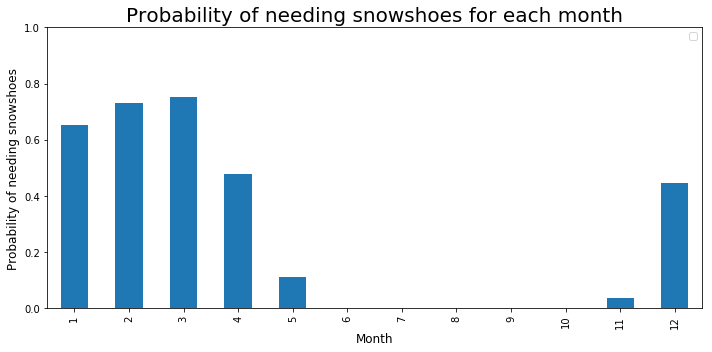

In [7]:
snowshoe_prob = snowshoe_df[['month','snowshoes']].groupby(['month']).mean()
snowshoe_prob.plot.bar()
demo.apply_plot_settings()

Another example plot: 
    
![alt text](../reports/figures/prob_snowshoes_by_peak.svg)

------------
# Classification

### Prepare the data: 
* One hot encoding
* Split the data into a training and a test set

In [8]:
x_train, x_test, y_train, y_test, msk = demo.prep_for_model(snowshoe_df)

In [9]:
x_train.head()

,peak_adams,peak_bond,peak_bond west,peak_bondcliff,peak_cabot,peak_cannon,peak_carrigain,peak_carter dome,peak_carter middle,peak_carter south,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
y_train.head()

1     False
3     False
6     False
7     False
10    False
Name: snowshoes, dtype: bool

# Model choice

*Baseline:* monthly mean probability of needing snowshoes 

*Logistic Regression:* with month and peak as inputs
* Probabilistic discriminative model 

### Baseline model

In [11]:
x_train_cat = snowshoe_df[msk]
snowshoe_prob = x_train_cat[['month','snowshoes']].groupby(['month']).mean()
test_month_list = snowshoe_df.month[~msk].tolist()
y_pred_baseline = snowshoe_prob.snowshoes[test_month_list]

### Logistic Regression

In [12]:
l = LogisticRegression()
l.fit(x_train,y_train)
y_pred = l.predict_proba(x_test)

# Model evaluation

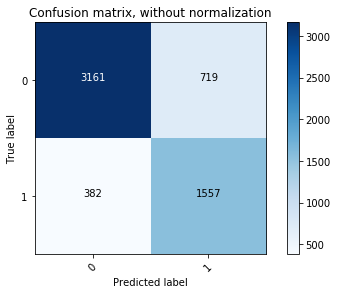

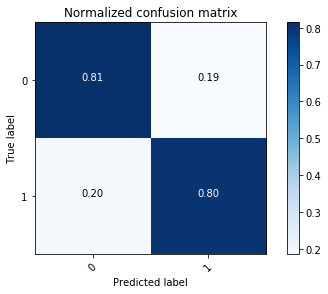

In [13]:
y_class_baseline = demo.get_class(y_pred)
cm(y_test,y_class_baseline,['0','1'])

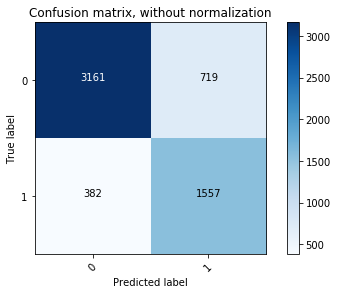

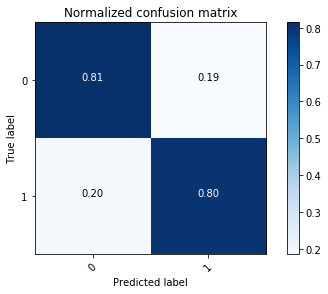

In [14]:
y_class = demo.get_class(y_pred)
cm(y_test,y_class,['0','1'])

# Model explanation

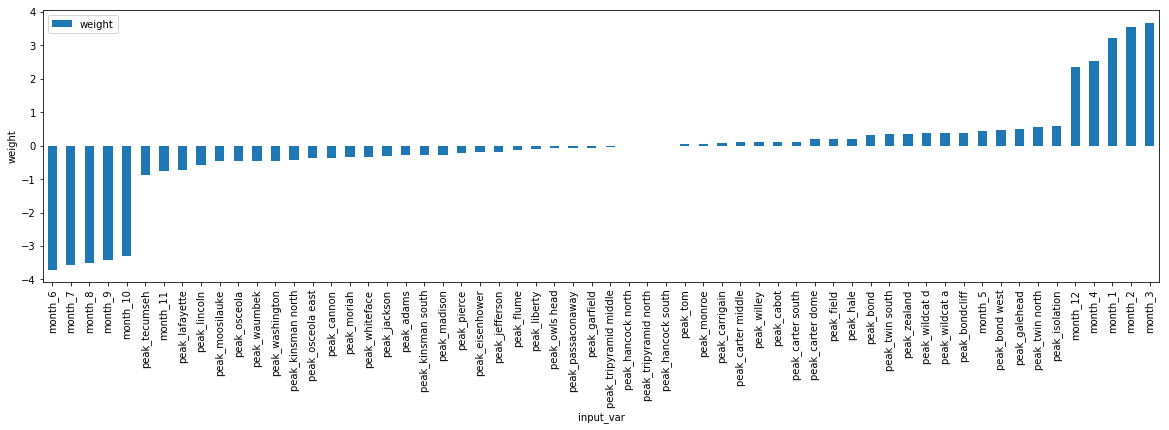

In [15]:
demo.plot_weights(l,x_test)

# Future directions

* Incorporating other predictors e.g. snowfall
* Cross-validation

* Other sub-projects:
    * Which rivers are unpassable? 